基于信用卡交易记录数据建立分类模型来预测那些交易记录是异常的，那些是正常的

# 任务流程

- 加载数据，观察问题
- 针对问题给出解决方案
- 数据集切分
- 评估方法对比
- 逻辑回归模型
- 建模结果分析
- 方案效果对比

## 主要解决问题

- 在此项目中，我们首先对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案
- 这里我们提出了两种方法，下采样和过采样，两条路线来进行对比试验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一首准备，得到的结果才有可选择的余地
- 在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要的操作，由于数据本身已经给定了特征，数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的
- 先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定的有一个合适的评估方法，可以用这些通用的，比如Recall,准确率等，也可以根据实际问题自己指定评估指标
- 选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。
- 模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。
- 得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。

# 实战开发

## 导入我们的工具包

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

import pylab as p

warnings.filterwarnings('ignore')
%matplotlib inline

## 数据读取

In [20]:
data=pd.read_csv('creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 数据标签分布

In [21]:
pd.value_counts(data['Class'],sort=True).sort_index()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

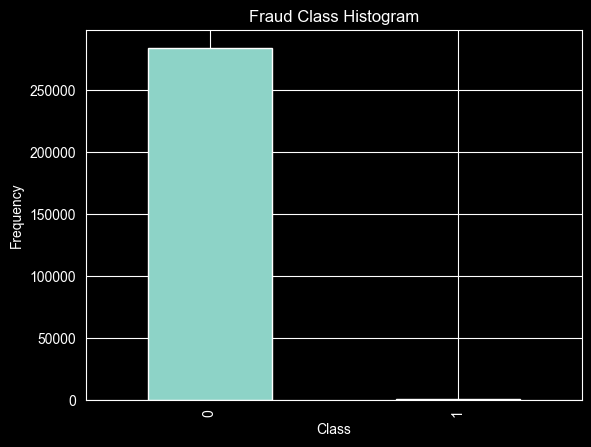

In [22]:
count_classes=pd.value_counts(data['Class'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud Class Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

### 数据标准化处理

In [23]:
from sklearn.preprocessing import StandardScaler

data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [24]:
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 下采样方案

In [25]:
data[data.Class==1].index

Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,   6338,
         6427,
       ...
       274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149, 281144,
       281674],
      dtype='int64', length=492)

In [ ]:
X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,data.columns=='Class']

# 得到所有异常样本的索引
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

# 得到所有正常样本的索引
normal_indices=data[data.Class==0].index

# 在正常样本中随机采样出指定个数的样本，并取其索引
normal_indices=data[data.Class==0].index

# 在正常样本中随机采样出指定个数的样本，并取其索引
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)

# 有了正常和异常样本后把它们的索引都拿到手
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

# 根据索引得到下采样所有样本点
under_sample_data=data.iloc[under_sample_indices,:]
X_undersample=under_sample_data.iloc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.iloc[:,under_sample_data.columns=='Class']

# 下采样 样本比例
print("正常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占整体比例: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))